# This is my sample .ipynb file!
This could be your analyses files, your visualization files, etc.

In [1]:
print('Hello FIN 377 class!')

Hello FIN 377 class!


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from df_after_transform import df_after_transform
from sklearn import set_config
from sklearn.calibration import CalibrationDisplay
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    DetCurveDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    classification_report,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

set_config(display="diagram")  # display='text' is the default

pd.set_option(
    "display.max_colwidth", 1000, "display.max_rows", 50, "display.max_columns", None
)

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Layoffs,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
0,2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0,MMM,3M,Industrials,Industrial Conglomerates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0,MMM,3M,Industrials,Industrial Conglomerates,589369.0,47.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-10-02,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0,MMM,3M,Industrials,Industrial Conglomerates,506082.0,43.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-10-05,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0,MMM,3M,Industrials,Industrial Conglomerates,489872.0,50.0,2.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2020-10-06,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0,MMM,3M,Industrials,Industrial Conglomerates,550713.0,50.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217806,2022-06-24,172.000000,174.679993,171.389999,174.610001,174.610001,3255000.0,ZTS,Zoetis,Health Care,Pharmaceuticals,533627.0,25.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
217807,2022-06-27,173.839996,175.210007,172.929993,173.600006,173.600006,1378400.0,ZTS,Zoetis,Health Care,Pharmaceuticals,433341.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217808,2022-06-28,172.960007,174.669998,170.009995,170.119995,170.119995,1725800.0,ZTS,Zoetis,Health Care,Pharmaceuticals,559643.0,16.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
217809,2022-06-29,172.000000,175.149994,170.149994,173.919998,173.919998,1658000.0,ZTS,Zoetis,Health Care,Pharmaceuticals,536364.0,22.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Security'])

In [6]:
df

,Date,Adj Close,Symbol,GICS Sector,GICS Sub-Industry,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Layoffs,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
0,2020-09-30,150.921692,MMM,Industrials,Industrial Conglomerates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,149.612045,MMM,Industrials,Industrial Conglomerates,589369.0,47.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-10-02,151.091309,MMM,Industrials,Industrial Conglomerates,506082.0,43.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-10-05,153.343170,MMM,Industrials,Industrial Conglomerates,489872.0,50.0,2.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2020-10-06,152.853195,MMM,Industrials,Industrial Conglomerates,550713.0,50.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217806,2022-06-24,174.610001,ZTS,Health Care,Pharmaceuticals,533627.0,25.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
217807,2022-06-27,173.600006,ZTS,Health Care,Pharmaceuticals,433341.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217808,2022-06-28,170.119995,ZTS,Health Care,Pharmaceuticals,559643.0,16.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
217809,2022-06-29,173.919998,ZTS,Health Care,Pharmaceuticals,536364.0,22.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import pandas as pd
df["Daily_RV"] = df.groupby("Symbol")["Adj Close"].pct_change()

In [8]:
df.describe()

,Adj Close,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Layoffs,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors,Daily_RV
count,217811.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217316.000000
mean,181.850304,522589.153103,84.601354,4.340680,3.788526,1.312781,0.085432,10.458908,11.294044,0.475985,3.557598,2.116461,0.081530,0.119903,4.243008,0.802165,0.005029,0.000696
std,318.763859,49863.993488,246.619349,28.298986,16.033536,9.080401,2.947930,31.119464,32.588282,2.353701,15.605966,11.248249,0.970355,3.310985,18.069263,6.864593,0.100878,0.021368
min,3.750584,317745.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.456763
25%,58.074932,494005.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010034
50%,110.048462,531109.000000,24.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000692
75%,204.220001,558752.000000,58.000000,1.000000,1.000000,0.000000,0.000000,10.000000,11.000000,0.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.011393
max,5959.330078,669851.000000,9769.000000,4550.000000,1182.000000,1148.000000,823.000000,842.000000,858.000000,173.000000,772.000000,1388.000000,93.000000,599.000000,1679.000000,1686.000000,12.000000,0.439739


In [9]:
df.describe()

,Adj Close,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Layoffs,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors,Daily_RV
count,217811.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217318.000000,217316.000000
mean,181.850304,522589.153103,84.601354,4.340680,3.788526,1.312781,0.085432,10.458908,11.294044,0.475985,3.557598,2.116461,0.081530,0.119903,4.243008,0.802165,0.005029,0.000696
std,318.763859,49863.993488,246.619349,28.298986,16.033536,9.080401,2.947930,31.119464,32.588282,2.353701,15.605966,11.248249,0.970355,3.310985,18.069263,6.864593,0.100878,0.021368
min,3.750584,317745.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.456763
25%,58.074932,494005.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010034
50%,110.048462,531109.000000,24.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000692
75%,204.220001,558752.000000,58.000000,1.000000,1.000000,0.000000,0.000000,10.000000,11.000000,0.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.011393
max,5959.330078,669851.000000,9769.000000,4550.000000,1182.000000,1148.000000,823.000000,842.000000,858.000000,173.000000,772.000000,1388.000000,93.000000,599.000000,1679.000000,1686.000000,12.000000,0.439739


In [10]:
df.columns

Index(['Date', 'Adj Close', 'Symbol', 'GICS Sector', 'GICS Sub-Industry',
       'News - All News Volume', 'News - Volume', 'News - Positive Sentiment',
       'News - Negative Sentiment', 'News - New Products', 'News - Layoffs',
       'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
       'News - Corporate Earnings', 'News - Mergers & Acquisitions',
       'News - Store Openings', 'News - Product Recalls',
       'News - Adverse Events', 'News - Personnel Changes',
       'News - Stock Rumors', 'Daily_RV'],
      dtype='object')

In [11]:
df = df.drop(df[(df['News - Layoffs']==823)|(df['News - Layoffs']==479)].index)

In [12]:
df['number of company layoff news'] = df.groupby('Symbol')['News - Layoffs'].transform('sum')

In [13]:
df

,Date,Adj Close,Symbol,GICS Sector,GICS Sub-Industry,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Layoffs,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors,Daily_RV,number of company layoff news
0,2020-09-30,150.921692,MMM,Industrials,Industrial Conglomerates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1,2020-10-01,149.612045,MMM,Industrials,Industrial Conglomerates,589369.0,47.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.008678,11.0
2,2020-10-02,151.091309,MMM,Industrials,Industrial Conglomerates,506082.0,43.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.009887,11.0
3,2020-10-05,153.343170,MMM,Industrials,Industrial Conglomerates,489872.0,50.0,2.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.014904,11.0
4,2020-10-06,152.853195,MMM,Industrials,Industrial Conglomerates,550713.0,50.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,-0.003195,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217806,2022-06-24,174.610001,ZTS,Health Care,Pharmaceuticals,533627.0,25.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.032157,0.0
217807,2022-06-27,173.600006,ZTS,Health Care,Pharmaceuticals,433341.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005784,0.0
217808,2022-06-28,170.119995,ZTS,Health Care,Pharmaceuticals,559643.0,16.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,-0.020046,0.0
217809,2022-06-29,173.919998,ZTS,Health Care,Pharmaceuticals,536364.0,22.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022337,0.0


In [14]:
df1=(df
   # compute gross returns for each asset
   .assign(R = 1+df['Daily_RV'])
   # for each portfolio and time period...
   .groupby(['Symbol','GICS Sector', 'GICS Sub-Industry','number of company layoff news'])
   # get the gross returns, and cumulate by taking the product
   ['R'].prod()
   # subtract one to get back to simple returns
   -1
)

In [15]:
df1=pd.DataFrame(df1)

In [16]:
df1=df1.reset_index()
df1

,Symbol,GICS Sector,GICS Sub-Industry,number of company layoff news,R
0,A,Health Care,Health Care Equipment,0.0,0.188945
1,AAL,Industrials,Airlines,372.0,0.031733
2,AAP,Consumer Discretionary,Automotive Retail,7.0,0.165533
3,AAPL,Information Technology,"Technology Hardware, Storage & Peripherals",198.0,0.193148
4,ABBV,Health Care,Pharmaceuticals,0.0,0.892653
...,...,...,...,...,...
490,YUM,Consumer Discretionary,Restaurants,0.0,0.282005
491,ZBH,Health Care,Health Care Equipment,3.0,-0.195343
492,ZBRA,Information Technology,Electronic Equipment & Instruments,0.0,0.164343
493,ZION,Financials,Regional Banks,0.0,0.823774


In [17]:
df1.describe()
df1.columns

Index(['Symbol', 'GICS Sector', 'GICS Sub-Industry',
       'number of company layoff news', 'R'],
      dtype='object')

<AxesSubplot:ylabel='News - Layoffs'>

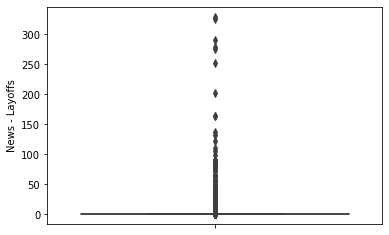

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
sns.boxplot(data=df, y="News - Layoffs")

<AxesSubplot:>

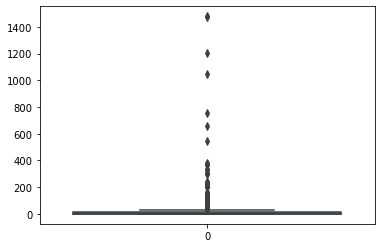

In [19]:
sns.boxplot(data=df1["number of company layoff news"])

<AxesSubplot:>

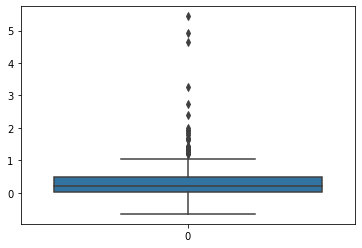

In [20]:
sns.boxplot(data=df1["R"])

In [21]:
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col # nicer tables

df1 = df1.rename(columns={'R': 'Return_value', 'number of company layoff news': 'layoff_news'})
                          
reg1 = sm_ols('Return_value ~ layoff_news', data=df1).fit()
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3790
Date:                Mon, 24 Apr 2023   Prob (F-statistic):              0.538
Time:                        16:54:27   Log-Likelihood:                -437.72
No. Observations:                 495   AIC:                             879.4
Df Residuals:                     493   BIC:                             887.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3180      0.027     11.678      0.000       0.264       0.371
layoff_news    -0.0001      0.000     -0.616      0.538      -0.000       0.000
==============================================================================
Omnibus:                      455.632   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15223.799
Skew:                           3.957   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df = df.rename(columns={'News - Layoffs': 'layoff_news'})
reg = sm_ols('Daily_RV ~ layoff_news', data=df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Daily_RV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1791
Date:                Mon, 24 Apr 2023   Prob (F-statistic):              0.672
Time:                        16:57:19   Log-Likelihood:             5.2743e+05
No. Observations:              217314   AIC:                        -1.055e+06
Df Residuals:                  217312   BIC:                        -1.055e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0007   4.59e-05     15.164      0.000       0.001       0.001
layoff_news  9.126e-06   2.16e-05      0.423      0.672   -3.31e-05    5.14e-05
==============================================================================
Omnibus:                    47629.508   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1546312.693
Skew:                           0.351   Prob(JB):                         0.00
Kurtosis:                      16.049   Cond. No.                         2.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
import pandas as pd

sample=pd.read_csv('IMPORTANT.csv')

In [104]:
sample

,Firm,Unnamed: 1,ticker
0,Opendoor,Opendoor Inc.,OPEN
1,Medtronic,Medtronic Inc.,MDT
2,Redfin,Redfin Inc.,RDFN
3,Acxiom,Acxiom Inc.,NaN
4,Pear Therapeutics,Pear Therapeutics Inc.,PEAR
...,...,...,...
257,GoPro,GoPro Inc.,GPRO
258,Domo,Domo Inc.,DOMO
259,Sage Therapeutics,Sage Therapeutics Inc.,SAGE
260,Maven,Maven Inc.,NaN


In [105]:
stocks

['OPEN',
 'MDT',
 'RDFN',
 'nan',
 'PEAR',
 'AMPL',
 'VIEW',
 'AAPL',
 'ROKU',
 'TREE',
 'KD',
 'EA',
 'STX',
 'ICAD',
 'SFT',
 'LCID',
 'LIDR',
 'BTTX',
 'MRVL',
 'EXPE',
 'AMZN',
 'COHR',
 'LFLY',
 'FRSH',
 'BOXDQ',
 'META',
 'SSNLF',
 'NLTX',
 'TTWO',
 'SIRI',
 'EMBK',
 'ABNB',
 'ACCD',
 'ZS',
 'TWKS',
 'SOND',
 'EB',
 'MLNK',
 'PLTR',
 'nan',
 'LHDXQ',
 'EVGO',
 'TASK',
 'MU',
 'DMRC',
 'DOCU',
 'REAL',
 'SMAR',
 'DOCN',
 'CXM',
 'METV',
 'RBOT',
 'UDMY',
 'TWLO',
 'RGTI',
 'OPRT',
 'GTLB',
 'BARK',
 'GDDY',
 'AFRM',
 'ZM',
 'EBAY',
 'SCWX',
 'DELL',
 'OKTA',
 'ADSK',
 'DM',
 'GETR',
 'SPLK',
 'PINS',
 'DKNG',
 'CYRNQ',
 'APGT',
 'FREQ',
 'MTCH',
 'RIVN',
 'PYPL',
 'NTAP',
 'WDAY',
 'HUBS',
 'UPST',
 'WISH',
 'NATI',
 'GRPN',
 'INTC',
 'BMTX',
 'QSI',
 'SOFI',
 'SNPS',
 'CFLT',
 'IBM',
 'LRCX',
 'GH',
 'VCSA',
 'PD',
 'CTV',
 'YEXT',
 'GOOG',
 'W',
 'COF',
 'PTRA',
 'WE',
 'LAW',
 'MGNI',
 'PSNL',
 'MSFT',
 'TDOC',
 'VRM',
 'EGHT',
 'PGY',
 'ISPO',
 'NCNO',
 'STRYQ',
 'BALY',
 'LUC

In [106]:
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

stocks = [str(ticker) for ticker in sample['ticker'].tolist()]  # convert tickers to strings
start = datetime(2020, 1, 1)
end = datetime(2023, 4, 1)

# load
stock_prices = yf.download(stocks, start, end)

[*********************100%***********************]  250 of 250 completed

2 Failed downloads:
- ZY: No timezone found, symbol may be delisted
- SMFR: No timezone found, symbol may be delisted


In [107]:
stock_prices

Adj Close                     ...     Volume               
                  AAPL        ABNB   ABSI  ...         ZS        ZUO  ZY
Date                                       ...                          
2020-01-02   73.449387         NaN    NaN  ...  1377200.0  1792600.0 NaN
2020-01-03   72.735313         NaN    NaN  ...  1165200.0  1104300.0 NaN
2020-01-06   73.314880         NaN    NaN  ...  1534600.0  2004800.0 NaN
2020-01-07   72.970078         NaN    NaN  ...  1714900.0   945600.0 NaN
2020-01-08   74.143898         NaN    NaN  ...  3232500.0   666500.0 NaN
...                ...         ...    ...  ...        ...        ...  ..
2023-03-27  158.279999  117.910004  1.730  ...  1715000.0   728500.0 NaN
2023-03-28  157.649994  116.610001  1.630  ...  1327700.0   599600.0 NaN
2023-03-29  160.770004  118.800003  1.765  ...  1923800.0   520100.0 NaN
2023-03-30  162.360001  122.279999  1.680  ...  1282800.0   647700.0 NaN
2023-03-31  164.899994  124.400002  1.750  ...  1887500.0  1794500.0 NaN

[1031 rows x 1500 columns]

In [108]:
stock_prices1 = stock_prices.transpose()
stock_prices1.index.names=["stock_info","ticker"]
stock_prices1.columns.names=["date"]
# 打印出前几行数据来检查 DataFrame 是否已经转置成功
stock_prices1.head()

date               2020-01-02  2020-01-03  ...  2023-03-30  2023-03-31
stock_info ticker                          ...                        
Adj Close  AAPL     73.449387   72.735313  ...  162.360001  164.899994
           ABNB           NaN         NaN  ...  122.279999  124.400002
           ABSI           NaN         NaN  ...    1.680000    1.750000
           ACCD           NaN         NaN  ...   13.570000   14.380000
           ADBE    334.429993  331.809998  ...  381.899994  385.369995

[5 rows x 1031 columns]

In [109]:
stock_prices1=stock_prices1[:249]

In [110]:
stock_prices1

date               2020-01-02  2020-01-03  ...  2023-03-30  2023-03-31
stock_info ticker                          ...                        
Adj Close  AAPL     73.449387   72.735313  ...  162.360001  164.899994
           ABNB           NaN         NaN  ...  122.279999  124.400002
           ABSI           NaN         NaN  ...    1.680000    1.750000
           ACCD           NaN         NaN  ...   13.570000   14.380000
           ADBE    334.429993  331.809998  ...  381.899994  385.369995
...                       ...         ...  ...         ...         ...
           YEXT     14.640000   14.250000  ...    9.340000    9.610000
           Z        45.209999   44.720001  ...   42.880001   44.470001
           ZM       68.720001   67.279999  ...   72.040001   73.839996
           ZS       47.330002   47.380001  ...  112.220001  116.830002
           ZUO      14.760000   14.770000  ...    9.290000    9.880000

[249 rows x 1031 columns]

In [111]:
stock_prices1 = stock_prices1.reset_index()

# 打印出前几行数据来检查 DataFrame 是否已经重置成功
stock_prices1.head()


date,stock_info,ticker,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,...,2023-02-20 00:00:00,2023-02-21 00:00:00,2023-02-22 00:00:00,2023-02-23 00:00:00,2023-02-24 00:00:00,2023-02-25 00:00:00,2023-02-26 00:00:00,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-03-01 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2023-03-04 00:00:00,2023-03-05 00:00:00,2023-03-06 00:00:00,2023-03-07 00:00:00,2023-03-08 00:00:00,2023-03-09 00:00:00,2023-03-10 00:00:00,2023-03-11 00:00:00,2023-03-12 00:00:00,2023-03-13 00:00:00,2023-03-14 00:00:00,2023-03-15 00:00:00,2023-03-16 00:00:00,2023-03-17 00:00:00,2023-03-18 00:00:00,2023-03-19 00:00:00,2023-03-20 00:00:00,2023-03-21 00:00:00,2023-03-22 00:00:00,2023-03-23 00:00:00,2023-03-24 00:00:00,2023-03-25 00:00:00,2023-03-26 00:00:00,2023-03-27 00:00:00,2023-03-28 00:00:00,2023-03-29 00:00:00,2023-03-30 00:00:00,2023-03-31 00:00:00
0,Adj Close,AAPL,73.449387,72.735313,73.314880,72.970078,74.143898,75.718788,75.889938,77.511307,76.464630,76.136955,77.090668,77.94416,77.415924,77.692268,78.066429,77.841431,75.552498,77.689819,79.316048,79.201111,75.689445,75.481583,77.973495,78.609322,79.528801,78.447800,78.820389,78.344826,80.205360,79.634201,79.653809,78.195312,79.327812,78.513977,76.736801,73.091789,70.615997,71.736237,...,NaN,148.479996,148.910004,149.399994,146.710007,NaN,NaN,147.919998,147.410004,145.309998,145.910004,151.029999,NaN,NaN,153.830002,151.600006,152.869995,150.589996,148.500000,NaN,NaN,150.470001,152.589996,152.990005,155.850006,155.000000,NaN,NaN,157.399994,159.279999,157.830002,158.929993,160.250000,NaN,NaN,158.279999,157.649994,160.770004,162.360001,164.899994
1,Adj Close,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,128.779999,127.209999,125.519997,122.779999,NaN,NaN,123.529999,123.279999,120.830002,122.379997,125.730003,NaN,NaN,126.330002,126.940002,125.000000,119.839996,118.300003,NaN,NaN,115.959999,116.360001,113.580002,119.989998,118.150002,NaN,NaN,118.400002,123.690002,121.169998,120.300003,116.919998,NaN,NaN,117.910004,116.610001,118.800003,122.279999,124.400002
2,Adj Close,ABSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.430000,2.460000,2.330000,2.240000,NaN,NaN,2.160000,2.120000,2.010000,2.160000,2.180000,NaN,NaN,2.090000,2.140000,2.060000,2.000000,1.860000,NaN,NaN,1.760000,1.745000,1.720000,1.675000,1.590000,NaN,NaN,1.585000,1.750000,1.690000,1.720000,1.720000,NaN,NaN,1.730000,1.630000,1.765000,1.680000,1.750000
3,Adj Close,ACCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.080000,11.430000,11.510000,11.120000,NaN,NaN,11.090000,11.110000,12.390000,12.370000,13.300000,NaN,NaN,12.830000,12.710000,12.830000,12.080000,11.530000,NaN,NaN,11.850000,12.010000,12.020000,12.270000,11.960000,NaN,NaN,11.950000,12.680000,11.960000,13.250000,13.610000,NaN,NaN,13.300000,13.060000,13.370000,13.570000,14.380000
4,Adj Close,ADBE,334.429993,331.809998,333.709991,333.390015,337.869995,340.450012,339.809998,345.630005,344.630005,342.940002,34

In [112]:
stock_prices1=stock_prices1.drop(["stock_info"], axis=1)

# 打印出前几行数据来检查 DataFrame 是否已经更新成功
stock_prices1

date,ticker,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,...,2023-02-20 00:00:00,2023-02-21 00:00:00,2023-02-22 00:00:00,2023-02-23 00:00:00,2023-02-24 00:00:00,2023-02-25 00:00:00,2023-02-26 00:00:00,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-03-01 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2023-03-04 00:00:00,2023-03-05 00:00:00,2023-03-06 00:00:00,2023-03-07 00:00:00,2023-03-08 00:00:00,2023-03-09 00:00:00,2023-03-10 00:00:00,2023-03-11 00:00:00,2023-03-12 00:00:00,2023-03-13 00:00:00,2023-03-14 00:00:00,2023-03-15 00:00:00,2023-03-16 00:00:00,2023-03-17 00:00:00,2023-03-18 00:00:00,2023-03-19 00:00:00,2023-03-20 00:00:00,2023-03-21 00:00:00,2023-03-22 00:00:00,2023-03-23 00:00:00,2023-03-24 00:00:00,2023-03-25 00:00:00,2023-03-26 00:00:00,2023-03-27 00:00:00,2023-03-28 00:00:00,2023-03-29 00:00:00,2023-03-30 00:00:00,2023-03-31 00:00:00
0,AAPL,73.449387,72.735313,73.314880,72.970078,74.143898,75.718788,75.889938,77.511307,76.464630,76.136955,77.090668,77.944160,77.415924,77.692268,78.066429,77.841431,75.552498,77.689819,79.316048,79.201111,75.689445,75.481583,77.973495,78.609322,79.528801,78.447800,78.820389,78.344826,80.205360,79.634201,79.653809,78.195312,79.327812,78.513977,76.736801,73.091789,70.615997,71.736237,67.046974,...,NaN,148.479996,148.910004,149.399994,146.710007,NaN,NaN,147.919998,147.410004,145.309998,145.910004,151.029999,NaN,NaN,153.830002,151.600006,152.869995,150.589996,148.500000,NaN,NaN,150.470001,152.589996,152.990005,155.850006,155.000000,NaN,NaN,157.399994,159.279999,157.830002,158.929993,160.250000,NaN,NaN,158.279999,157.649994,160.770004,162.360001,164.899994
1,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,128.779999,127.209999,125.519997,122.779999,NaN,NaN,123.529999,123.279999,120.830002,122.379997,125.730003,NaN,NaN,126.330002,126.940002,125.000000,119.839996,118.300003,NaN,NaN,115.959999,116.360001,113.580002,119.989998,118.150002,NaN,NaN,118.400002,123.690002,121.169998,120.300003,116.919998,NaN,NaN,117.910004,116.610001,118.800003,122.279999,124.400002
2,ABSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.430000,2.460000,2.330000,2.240000,NaN,NaN,2.160000,2.120000,2.010000,2.160000,2.180000,NaN,NaN,2.090000,2.140000,2.060000,2.000000,1.860000,NaN,NaN,1.760000,1.745000,1.720000,1.675000,1.590000,NaN,NaN,1.585000,1.750000,1.690000,1.720000,1.720000,NaN,NaN,1.730000,1.630000,1.765000,1.680000,1.750000
3,ACCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.080000,11.430000,11.510000,11.120000,NaN,NaN,11.090000,11.110000,12.390000,12.370000,13.300000,NaN,NaN,12.830000,12.710000,12.830000,12.080000,11.530000,NaN,NaN,11.850000,12.010000,12.020000,12.270000,11.960000,NaN,NaN,11.950000,12.680000,11.960000,13.250000,13.610000,NaN,NaN,13.300000,13.060000,13.370000,13.570000,14.380000
4,ADBE,334.429993,331.809998,333.709991,333.390015,337.869995,340.450012,339.809998,345.630005,344.630005,342.940002,345.380005,349.73999

In [113]:
stock_prices1.rename(columns={"date": "index"}, inplace=True)
stock_prices1

date,ticker,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,...,2023-02-20 00:00:00,2023-02-21 00:00:00,2023-02-22 00:00:00,2023-02-23 00:00:00,2023-02-24 00:00:00,2023-02-25 00:00:00,2023-02-26 00:00:00,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-03-01 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2023-03-04 00:00:00,2023-03-05 00:00:00,2023-03-06 00:00:00,2023-03-07 00:00:00,2023-03-08 00:00:00,2023-03-09 00:00:00,2023-03-10 00:00:00,2023-03-11 00:00:00,2023-03-12 00:00:00,2023-03-13 00:00:00,2023-03-14 00:00:00,2023-03-15 00:00:00,2023-03-16 00:00:00,2023-03-17 00:00:00,2023-03-18 00:00:00,2023-03-19 00:00:00,2023-03-20 00:00:00,2023-03-21 00:00:00,2023-03-22 00:00:00,2023-03-23 00:00:00,2023-03-24 00:00:00,2023-03-25 00:00:00,2023-03-26 00:00:00,2023-03-27 00:00:00,2023-03-28 00:00:00,2023-03-29 00:00:00,2023-03-30 00:00:00,2023-03-31 00:00:00
0,AAPL,73.449387,72.735313,73.314880,72.970078,74.143898,75.718788,75.889938,77.511307,76.464630,76.136955,77.090668,77.944160,77.415924,77.692268,78.066429,77.841431,75.552498,77.689819,79.316048,79.201111,75.689445,75.481583,77.973495,78.609322,79.528801,78.447800,78.820389,78.344826,80.205360,79.634201,79.653809,78.195312,79.327812,78.513977,76.736801,73.091789,70.615997,71.736237,67.046974,...,NaN,148.479996,148.910004,149.399994,146.710007,NaN,NaN,147.919998,147.410004,145.309998,145.910004,151.029999,NaN,NaN,153.830002,151.600006,152.869995,150.589996,148.500000,NaN,NaN,150.470001,152.589996,152.990005,155.850006,155.000000,NaN,NaN,157.399994,159.279999,157.830002,158.929993,160.250000,NaN,NaN,158.279999,157.649994,160.770004,162.360001,164.899994
1,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,128.779999,127.209999,125.519997,122.779999,NaN,NaN,123.529999,123.279999,120.830002,122.379997,125.730003,NaN,NaN,126.330002,126.940002,125.000000,119.839996,118.300003,NaN,NaN,115.959999,116.360001,113.580002,119.989998,118.150002,NaN,NaN,118.400002,123.690002,121.169998,120.300003,116.919998,NaN,NaN,117.910004,116.610001,118.800003,122.279999,124.400002
2,ABSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.430000,2.460000,2.330000,2.240000,NaN,NaN,2.160000,2.120000,2.010000,2.160000,2.180000,NaN,NaN,2.090000,2.140000,2.060000,2.000000,1.860000,NaN,NaN,1.760000,1.745000,1.720000,1.675000,1.590000,NaN,NaN,1.585000,1.750000,1.690000,1.720000,1.720000,NaN,NaN,1.730000,1.630000,1.765000,1.680000,1.750000
3,ACCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.080000,11.430000,11.510000,11.120000,NaN,NaN,11.090000,11.110000,12.390000,12.370000,13.300000,NaN,NaN,12.830000,12.710000,12.830000,12.080000,11.530000,NaN,NaN,11.850000,12.010000,12.020000,12.270000,11.960000,NaN,NaN,11.950000,12.680000,11.960000,13.250000,13.610000,NaN,NaN,13.300000,13.060000,13.370000,13.570000,14.380000
4,ADBE,334.429993,331.809998,333.709991,333.390015,337.869995,340.450012,339.809998,345.630005,344.630005,342.940002,345.380005,349.73999

In [114]:
sample=sample.drop(['Unnamed: 1'], axis=1)

sample

,Firm,ticker
0,Opendoor,OPEN
1,Medtronic,MDT
2,Redfin,RDFN
3,Acxiom,NaN
4,Pear Therapeutics,PEAR
...,...,...
257,GoPro,GPRO
258,Domo,DOMO
259,Sage Therapeutics,SAGE
260,Maven,NaN


In [115]:
new=sample.merge(stock_prices1, on='ticker')
new

,Firm,ticker,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,...,2023-02-20 00:00:00,2023-02-21 00:00:00,2023-02-22 00:00:00,2023-02-23 00:00:00,2023-02-24 00:00:00,2023-02-25 00:00:00,2023-02-26 00:00:00,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-03-01 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2023-03-04 00:00:00,2023-03-05 00:00:00,2023-03-06 00:00:00,2023-03-07 00:00:00,2023-03-08 00:00:00,2023-03-09 00:00:00,2023-03-10 00:00:00,2023-03-11 00:00:00,2023-03-12 00:00:00,2023-03-13 00:00:00,2023-03-14 00:00:00,2023-03-15 00:00:00,2023-03-16 00:00:00,2023-03-17 00:00:00,2023-03-18 00:00:00,2023-03-19 00:00:00,2023-03-20 00:00:00,2023-03-21 00:00:00,2023-03-22 00:00:00,2023-03-23 00:00:00,2023-03-24 00:00:00,2023-03-25 00:00:00,2023-03-26 00:00:00,2023-03-27 00:00:00,2023-03-28 00:00:00,2023-03-29 00:00:00,2023-03-30 00:00:00,2023-03-31 00:00:00
0,Opendoor,OPEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.840000,1.850000,1.820000,1.600000,NaN,NaN,1.440000,1.440000,1.340000,1.400000,1.530000,NaN,NaN,1.470000,1.455000,1.560000,1.355000,1.190000,NaN,NaN,1.320000,1.380000,1.620000,1.670000,1.610000,NaN,NaN,1.450000,1.690000,1.540000,1.700000,1.660000,NaN,NaN,1.600000,1.470000,1.580000,1.630000,1.760000
1,Medtronic,MDT,105.364601,104.739197,105.668129,105.300217,107.148880,108.887192,109.117126,108.537682,107.645546,107.912270,109.319450,109.475815,110.662277,111.370468,111.260101,109.687363,109.659767,109.613777,108.868790,108.666451,106.173965,108.519287,110.358757,110.938194,111.563629,109.402229,109.797722,109.402229,107.139687,107.452408,107.912270,103.617119,104.638023,104.720802,104.187347,102.412254,99.818611,97.629669,...,NaN,84.762787,84.376106,83.275551,82.779800,NaN,NaN,82.680656,82.095680,81.381798,81.560272,82.700485,NaN,NaN,81.233078,79.061699,77.733101,77.336502,76.067390,NaN,NaN,77.316681,77.197693,77.743019,78.595695,77.624039,NaN,NaN,78.932808,80.539032,79.260002,77.570000,79.370003,NaN,NaN,79.639999,79.510002,79.070000,79.180000,80.620003
2,Redfin,RDFN,21.625000,21.610001,21.410000,21.469999,21.459999,21.709999,21.850000,22.250000,22.360001,23.950001,24.219999,23.520000,24.049999,24.490000,24.950001,25.000000,24.660000,24.920000,24.980000,24.350000,24.330000,24.580000,25.840000,25.400000,25.790001,25.100000,24.670000,25.110001,25.500000,30.110001,31.230000,30.900000,31.389999,32.209999,32.430000,31.629999,29.750000,29.260000,...,NaN,8.340000,8.610000,8.150000,7.610000,NaN,NaN,7.560000,7.410000,7.200000,7.240000,7.870000,NaN,NaN,7.490000,7.300000,7.560000,6.980000,6.720000,NaN,NaN,7.660000,7.770000,8.450000,8.740000,8.240000,NaN,NaN,7.970000,8.430000,7.710000,8.290000,8.000000,NaN,NaN,8.270000,7.850000,8.260000,8.160000,9.060000
3,Pear Therapeutics,PEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.010000,1.040000,1.040000,0.991300,NaN,NaN,1.010000,0.987800,0.989100,0.994700,1.000000,NaN,NaN,0.952100,0.926500,0.823400,0.718100,0.608000,NaN,NaN,0.564500,0.625100,0.595200,0.593100,0.390100,NaN,NaN,0.209600,0.335100,0.257800,0.250000,0.289800,NaN,NaN,0.270000,0.259500,0.250000,0.260

In [116]:
layoff=pd.read_csv('layoffs_data.csv')

layoff

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,https://www.inman.com/2023/04/18/opendoor-lays...,1900.0,Post-IPO,2023-04-18 17:55:14,United States,Unknown
1,Culture Amp,Melbourne,HR,NaN,0.09,2023-04-18,https://www.cultureamp.com/company/announcemen...,257.0,Series F,2023-04-19 00:21:55,Australia,Unknown
2,Noon,Riyadh,Retail,NaN,0.10,2023-04-18,https://yourstory.com/ys-gulf/noon-lays-off-10...,NaN,Unknown,2023-04-19 00:23:39,Saudi Arabia,Unknown
3,Ten Square Games,Wrocław,Consumer,120.0,0.25,2023-04-17,https://economictimes.indiatimes.com/tech/tech...,NaN,Seed,2023-04-18 04:44:03,Poland,Unknown
4,Ynsect,Paris,Food,17.0,0.25,2023-04-17,https://pitchbook.com/news/articles/agtech-yns...,579.0,Series D,2023-04-18 04:45:17,France,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
2504,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
2505,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
2506,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


In [117]:
newdata=layoff.merge(new, left_on='Company', right_on='Firm')
newdata

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off,Firm,ticker,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,...,2023-02-20 00:00:00,2023-02-21 00:00:00,2023-02-22 00:00:00,2023-02-23 00:00:00,2023-02-24 00:00:00,2023-02-25 00:00:00,2023-02-26 00:00:00,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-03-01 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2023-03-04 00:00:00,2023-03-05 00:00:00,2023-03-06 00:00:00,2023-03-07 00:00:00,2023-03-08 00:00:00,2023-03-09 00:00:00,2023-03-10 00:00:00,2023-03-11 00:00:00,2023-03-12 00:00:00,2023-03-13 00:00:00,2023-03-14 00:00:00,2023-03-15 00:00:00,2023-03-16 00:00:00,2023-03-17 00:00:00,2023-03-18 00:00:00,2023-03-19 00:00:00,2023-03-20 00:00:00,2023-03-21 00:00:00,2023-03-22 00:00:00,2023-03-23 00:00:00,2023-03-24 00:00:00,2023-03-25 00:00:00,2023-03-26 00:00:00,2023-03-27 00:00:00,2023-03-28 00:00:00,2023-03-29 00:00:00,2023-03-30 00:00:00,2023-03-31 00:00:00
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,https://www.inman.com/2023/04/18/opendoor-lays...,1900.0,Post-IPO,2023-04-18 17:55:14,United States,Unknown,Opendoor,OPEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.840000,1.850000,1.820000,1.600000,NaN,NaN,1.440000,1.440000,1.340000,1.400000,1.530000,NaN,NaN,1.470000,1.455000,1.560000,1.355000,1.190000,NaN,NaN,1.320000,1.380000,1.620000,1.670000,1.610000,NaN,NaN,1.450000,1.690000,1.540000,1.700000,1.660000,NaN,NaN,1.600000,1.470000,1.580000,1.630000,1.760000
1,Opendoor,SF Bay Area,Real Estate,550.0,0.18,2022-11-02,https://www.bloomberg.com/news/articles/2022-1...,1900.0,Post-IPO,2022-11-02 17:07:34,United States,https://coda.io/@opendoorosn/opendoor-os-natio...,Opendoor,OPEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.840000,1.850000,1.820000,1.600000,NaN,NaN,1.440000,1.440000,1.340000,1.400000,1.530000,NaN,NaN,1.470000,1.455000,1.560000,1.355000,1.190000,NaN,NaN,1.320000,1.380000,1.620000,1.670000,1.610000,NaN,NaN,1.450000,1.690000,1.540000,1.700000,1.660000,NaN,NaN,1.600000,1.470000,1.580000,1.630000,1.760000
2,Opendoor,SF Bay Area,Real Estate,600.0,0.35,2020-04-15,https://layoffs.fyi/2020/04/16/opendoor-lays-o...,1500.0,Series E,2020-04-15 19:27:35,United States,Unknown,Opendoor,OPEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.840000,1.850000,1.820000,1.600000,NaN,NaN,1.440000,1.440000,1.340000,1.400000,1.530000,NaN,NaN,1.470000,1.455000,1.560000,1.355000,1.190000,NaN,NaN,1.320000,1.380000,1.620000,1.670000,1.610000,NaN,NaN,1.450000,1.690000,1.540000,1.700000,1.660000,NaN,NaN,1.600000,1.470000,1.580000,1.630000,1.760000
3,Medtronic,SF Bay Area,Healthcare,59.0,NaN,2023-04-12,https://www.massdevice.com/medtronic-layoffs-c...,5900.0,Post-IPO,2023-04-14 03:06:16,United States,Unknown,Medtronic,MDT,105.364601,104.739197,105.668129,105.300217,107.148880,108.887192,109.117126,108.537682,107.645546,107.912270,109.319450,109.475815,110.662277,111.370468,111.260101,109.687363,109.659767,109.613777,108.868790,108.666451,106.173965,108.519287,110.358757,110.938194,111.563629,109.402229,...,NaN,84.762787,84.376106,83.275551,82.779800,NaN,NaN,82.680656,82.095680,81.381798,81.560272,82.700485,NaN,NaN,81.233078,79.061699,77.733101,77.336502,76.067390,NaN,NaN,77.316681,77.197693,77.743019,78.595695,77.624039,NaN,NaN,78.932808,80.539032,

In [119]:
>>> from pathlib import Path  
>>> filepath = Path('newdata.csv')  
>>> filepath.parent.mkdir(parents=True, exist_ok=True)  
>>> newdata.to_csv(filepath)  